In [ ]:
from google.colab import drive
drive.mount('/content/drive')

# Baseline models

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [ ]:
plt.rcParams["figure.figsize"] = (9,6)

## Read the data

In [ ]:
df = pd.read_csv('/content/monthly-milk-production-pounds.csv')
df.columns = ['Month', 'Milk']

df.head()

,Month,Milk
0,1962-01,589
1,1962-02,561
2,1962-03,640
3,1962-04,656
4,1962-05,727


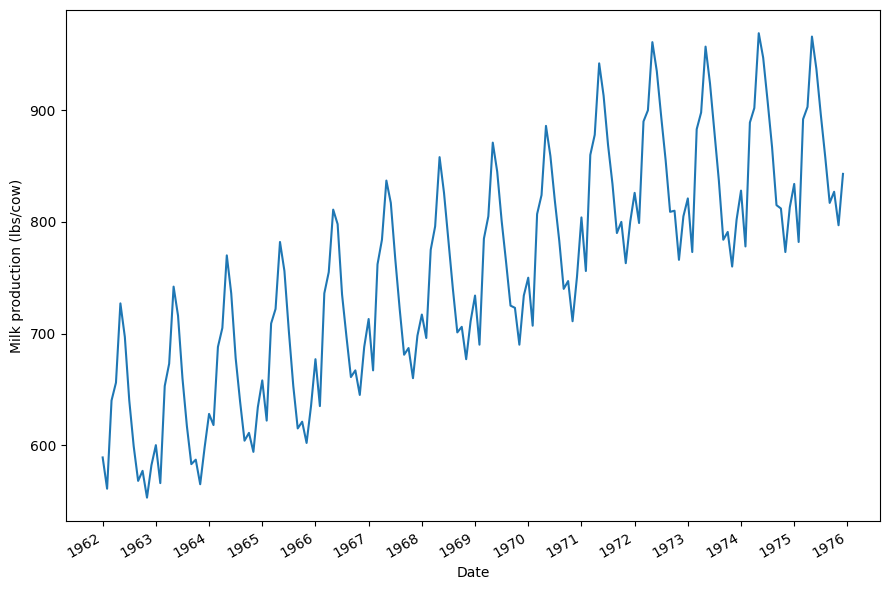

In [ ]:
fig, ax = plt.subplots()

ax.plot(df['Month'], df['Milk'])
ax.set_xlabel('Date')
ax.set_ylabel('Milk production (lbs/cow)')

plt.xticks(np.arange(0, 179, 12), np.arange(1962, 1977, 1))

fig.autofmt_xdate()
plt.tight_layout()

## Train/test split

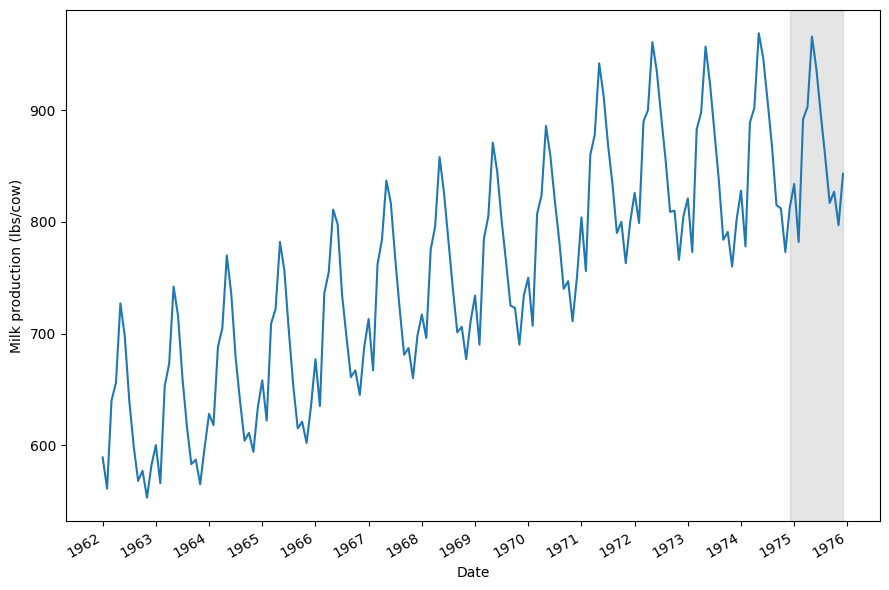

In [ ]:
fig, ax = plt.subplots()

ax.plot(df['Month'], df['Milk'])
ax.set_xlabel('Date')
ax.set_ylabel('Milk production (lbs/cow)')

plt.xticks(np.arange(0, 179, 12), np.arange(1962, 1977, 1))
ax.axvspan(155, 167, color='#808080', alpha=0.2)

fig.autofmt_xdate()
plt.tight_layout()

In [ ]:
train = df[:-12]
test = df[-12:]

## Baseline 1: Predict the mean

In [ ]:
pred_df = test.copy()

pred_df['mean'] = np.mean(train['Milk'])

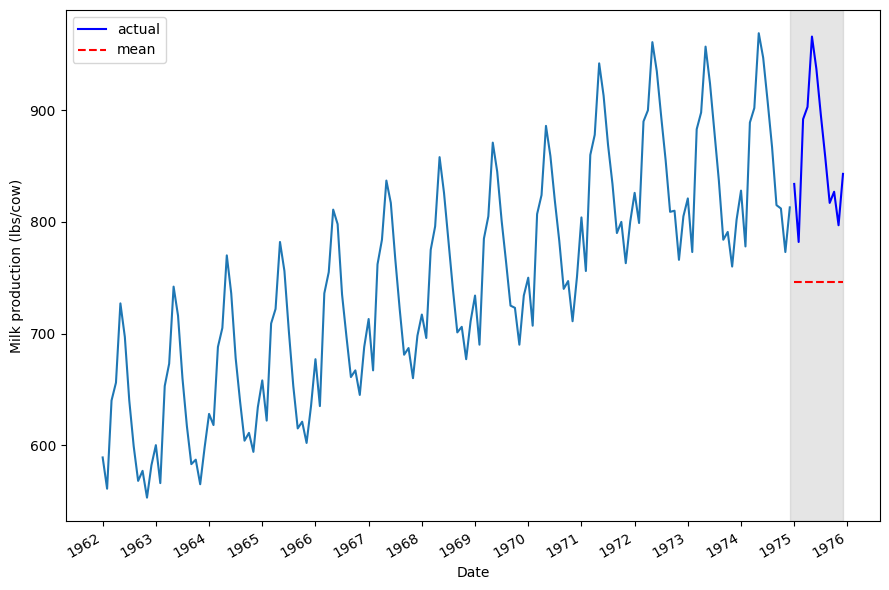

In [ ]:
fig, ax = plt.subplots()

ax.plot(train['Month'], train['Milk'])
ax.plot(pred_df['Month'], pred_df['Milk'], 'b-', label='actual')
ax.plot(pred_df['mean'], 'r--', label='mean')
ax.set_xlabel('Date')
ax.set_ylabel('Milk production (lbs/cow)')
ax.legend(loc='best')

plt.xticks(np.arange(0, 179, 12), np.arange(1962, 1977, 1))
ax.axvspan(155, 167, color='#808080', alpha=0.2)

fig.autofmt_xdate()
plt.tight_layout()

## Baseline 2: Predict last year's mean

In [ ]:
pred_df['mean_last_year'] = np.mean(train['Milk'][-12:])

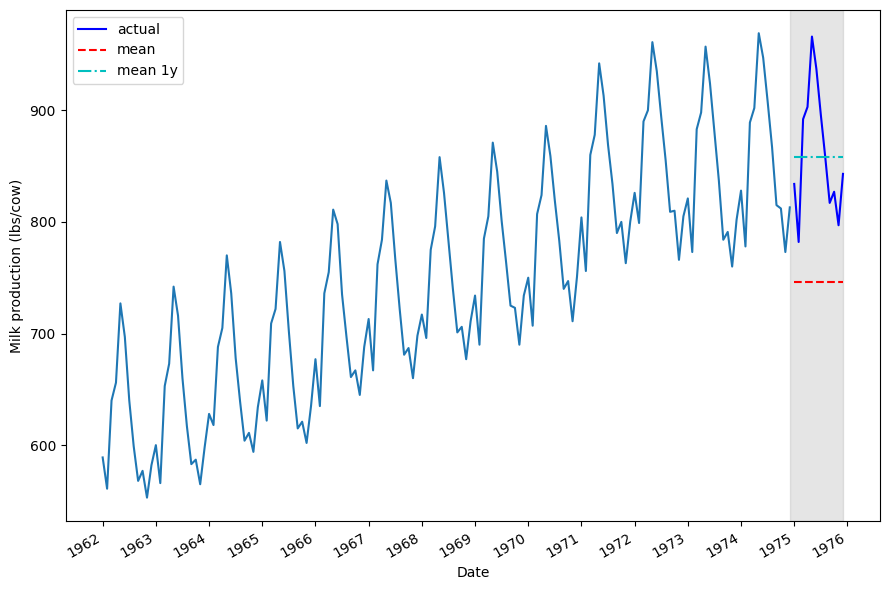

In [ ]:
fig, ax = plt.subplots()

ax.plot(train['Month'], train['Milk'])
ax.plot(pred_df['Month'], pred_df['Milk'], 'b-', label='actual')
ax.plot(pred_df['mean'], 'r--', label='mean')
ax.plot(pred_df['mean_last_year'], 'c-.', label='mean 1y')
ax.set_xlabel('Date')
ax.set_ylabel('Milk production (lbs/cow)')
ax.legend(loc='best')

plt.xticks(np.arange(0, 179, 12), np.arange(1962, 1977, 1))
ax.axvspan(155, 167, color='#808080', alpha=0.2)

fig.autofmt_xdate()
plt.tight_layout()

## Baseline 3: Predict the last known value (RANDOM WALK)

In [ ]:
pred_df['last'] = train['Milk'].iloc[-1]

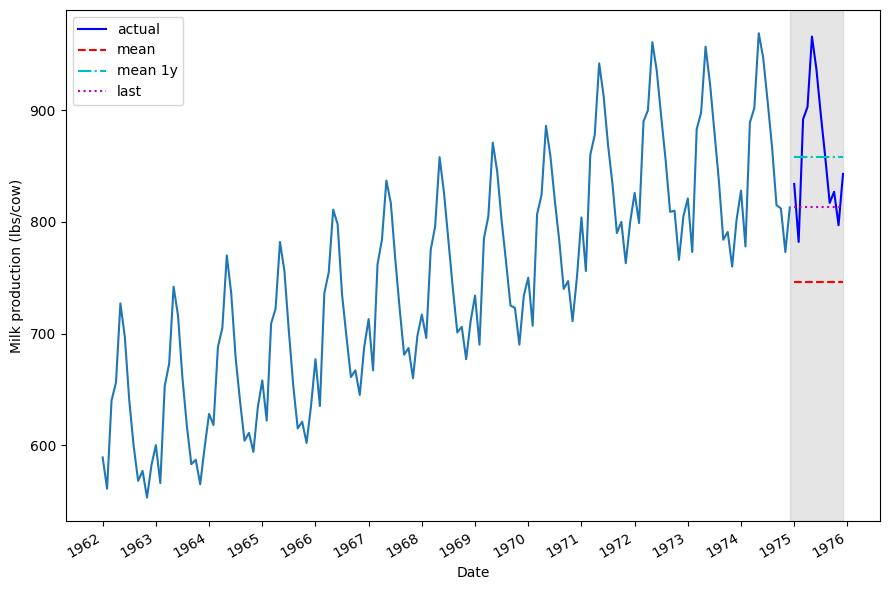

In [ ]:
fig, ax = plt.subplots()

ax.plot(train['Month'], train['Milk'])
ax.plot(pred_df['Month'], pred_df['Milk'], 'b-', label='actual')
ax.plot(pred_df['mean'], 'r--', label='mean')
ax.plot(pred_df['mean_last_year'], 'c-.', label='mean 1y')
ax.plot(pred_df['last'], 'm:', label='last')
ax.set_xlabel('Date')
ax.set_ylabel('Milk production (lbs/cow)')
ax.legend(loc='best')

plt.xticks(np.arange(0, 179, 12), np.arange(1962, 1977, 1))
ax.axvspan(155, 167, color='#808080', alpha=0.2)

fig.autofmt_xdate()
plt.tight_layout()

## Baseline 4: Predict the last season (SEASONAL RANDOM WALK)

In [ ]:
pred_df['last_season'] = train['Milk'][-12:].values

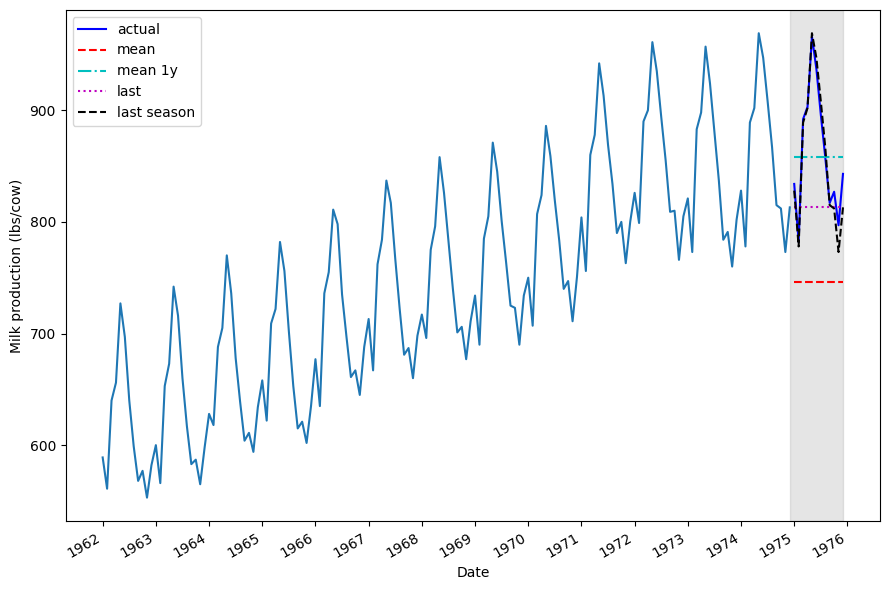

In [ ]:
fig, ax = plt.subplots()

ax.plot(train['Month'], train['Milk'])
ax.plot(pred_df['Month'], pred_df['Milk'], 'b-', label='actual')
ax.plot(pred_df['mean'], 'r--', label='mean')
ax.plot(pred_df['mean_last_year'], 'c-.', label='mean 1y')
ax.plot(pred_df['last'], 'm:', label='last')
ax.plot(pred_df['last_season'], 'k--', label='last season')
ax.set_xlabel('Date')
ax.set_ylabel('Milk production (lbs/cow)')
ax.legend(loc='best')

plt.xticks(np.arange(0, 179, 12), np.arange(1962, 1977, 1))
ax.axvspan(155, 167, color='#808080', alpha=0.2)

fig.autofmt_xdate()
plt.tight_layout()

## Evaluation

In [ ]:
def mape(y_true, y_pred):
    return round(np.mean(np.abs((y_true - y_pred) / y_true)) * 100,2)

In [ ]:
mape_mean = mape(pred_df['Milk'], pred_df['mean'])
mape_mean_1y = mape(pred_df['Milk'], pred_df['mean_last_year'])
mape_last = mape(pred_df['Milk'], pred_df['last'])
mape_last_season = mape(pred_df['Milk'], pred_df['last_season'])

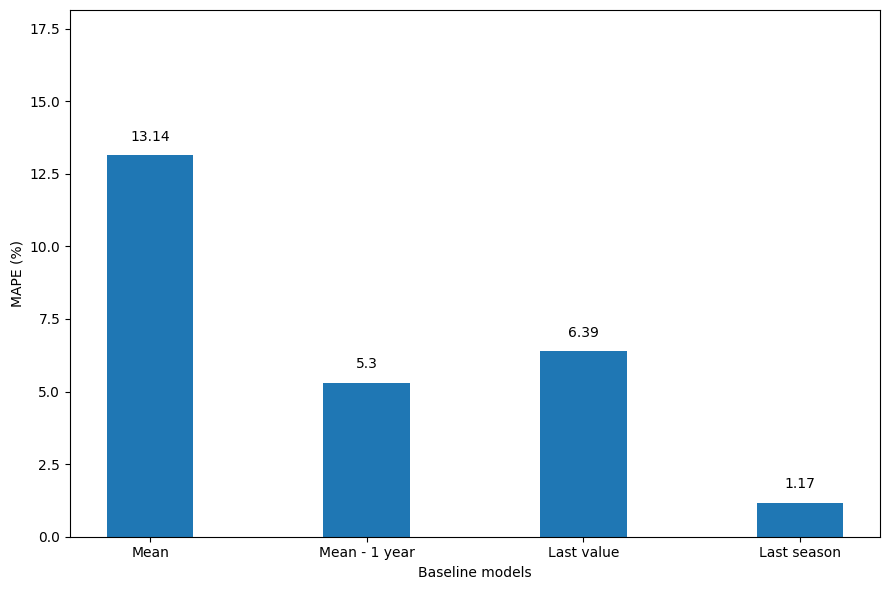

In [ ]:
fig, ax = plt.subplots()

x = ['Mean', 'Mean - 1 year', 'Last value', 'Last season']
y = [mape_mean, mape_mean_1y, mape_last, mape_last_season]

ax.bar(x, y, width=0.4)
ax.set_xlabel('Baseline models')
ax.set_ylabel('MAPE (%)')
ax.set_ylim(0, max(y) + 5)

for index, value in enumerate(y):
    plt.text(x=index, y=value + 0.5, s=str(value), ha='center')

plt.tight_layout()

# Exponential Smoothing

* Exponential smoothing, proposed by Brown, Holt, and Winters in 1950s, is a time series forecasting method for univariate data
where the prediction is a weighted linear sum of recent past observations or lags.

*  Forecasts produced using exponential smoothing methods are weighted averages of past observations, with the weights decaying exponentially as the observations get older. In other words, the more recent the observation the higher the associated weight.

* The methods are sometimes referred to as ETS models, referring to the explicit modeling of Error, Trend and Seasonality.

In [ ]:
df = pd.read_csv('h02.csv', index_col=0)
df.head()

,time,value
1,1991.500000,0.429795
2,1991.583333,0.400906
3,1991.666667,0.432159
4,1991.750000,0.492543
5,1991.833333,0.502369


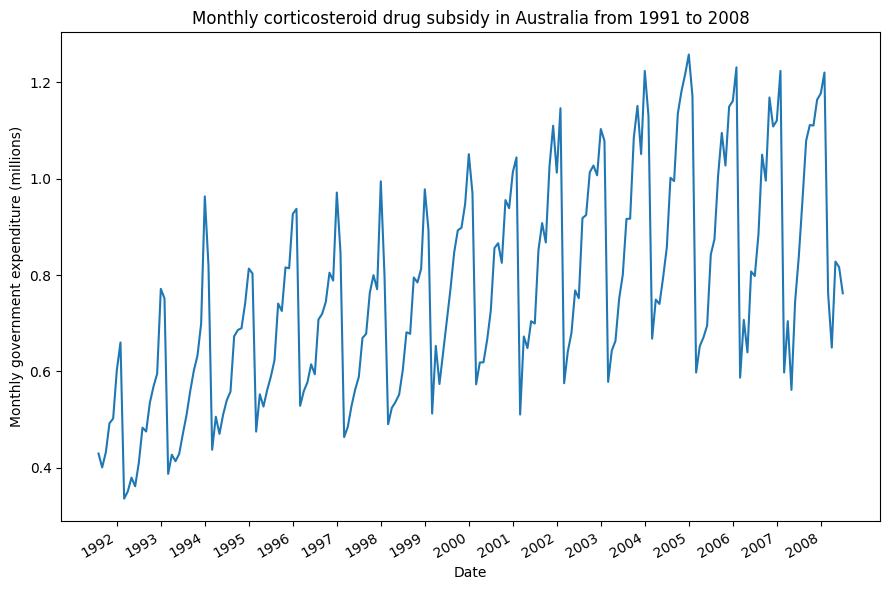

In [ ]:
fig, ax = plt.subplots()

ax.plot(df['value'])
ax.set_xlabel('Date')
ax.set_ylabel('Monthly government expenditure (millions)')

plt.xticks(np.arange(6, 204, 12), np.arange(1992, 2009, 1))

plt.title('Monthly corticosteroid drug subsidy in Australia from 1991 to 2008')

fig.autofmt_xdate()
plt.tight_layout()

## Simple exponential smoothing

$$\hat{y}_{T+1 \mid T}=\alpha y_T+\alpha(1-\alpha) y_{T-1}+\alpha(1-\alpha)^2 y_{T-2}+\cdots,$$

where $0 \leq \alpha \leq 1$ is the smoothing parameter. The one-step-ahead forecast for time $T+1$ is a weighted average of all of the observations in the series $y_1, \ldots, y_T$. The rate at which the weights decrease is controlled by the parameter $\alpha$.

In [ ]:
train = df[:-36]
test = df[-36:]

In [ ]:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing

def rolling_forecast(df: pd.DataFrame, train_len: int, horizon: int, window: int, method: str) -> list:

    total_len = train_len + horizon
    end_idx = train_len

    if method == 'last_season':
        pred_last_season = []

        for i in range(train_len, total_len, window):
            last_season = df[:i].iloc[-12:].values
            pred_last_season.extend(last_season)

        return pred_last_season

    elif method == 'simple_exp':
        pred_simple_exp = []

        for i in range(train_len, total_len, window):
            ses = SimpleExpSmoothing(df[:i], initialization_method='estimated').fit()
            predictions = ses.forecast(window)
            pred_simple_exp.extend(predictions)

        print(f"alpha = {ses.model.params['smoothing_level']}")

        return pred_simple_exp

In [ ]:
TRAIN_LEN = len(train)
HORIZON = len(test)
WINDOW = 12

pred_last_season = rolling_forecast(df['value'], TRAIN_LEN, HORIZON, WINDOW, 'last_season')
pred_simple_exp = rolling_forecast(df['value'], TRAIN_LEN, HORIZON, WINDOW, 'simple_exp')

test.loc[:, 'pred_last_season'] = pred_last_season
test.loc[:, 'pred_simple_exp'] = pred_simple_exp

test.head()

alpha = 0.8657938173584798


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided a

,time,value,pred_last_season,pred_simple_exp
169,2005.500000,0.874336,1.001593,0.828866
170,2005.583333,1.006497,0.994864,0.828866
171,2005.666667,1.094736,1.134432,0.828866
172,2005.750000,1.027043,1.181011,0.828866
173,2005.833333,1.149232,1.216037,0.828866


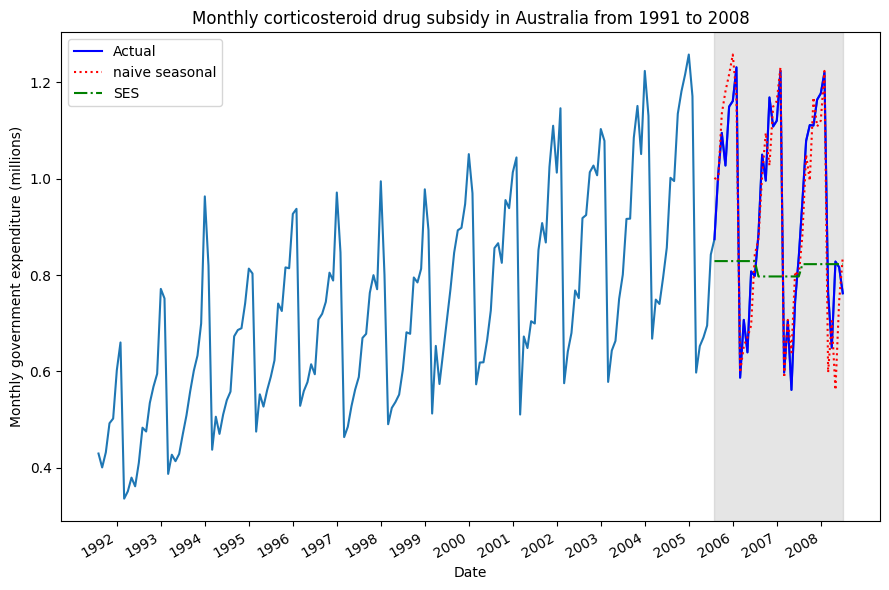

In [ ]:
fig, ax = plt.subplots()

ax.plot(df['value'])
ax.plot(test['value'], 'b-', label='Actual')
ax.plot(test['pred_last_season'], 'r:', label='naive seasonal')
ax.plot(test['pred_simple_exp'], 'g-.', label='SES')
ax.set_xlabel('Date')
ax.set_ylabel('Monthly government expenditure (millions)')
ax.axvspan(169, 204, color='#808080', alpha=0.2)
ax.legend(loc='best')

plt.xticks(np.arange(6, 204, 12), np.arange(1992, 2009, 1))

plt.title('Monthly corticosteroid drug subsidy in Australia from 1991 to 2008')

fig.autofmt_xdate()
plt.tight_layout()

### Evaluation

In [ ]:
from sklearn.metrics import mean_absolute_error

baseline_mae = mean_absolute_error(test['value'], test['pred_last_season'])
ses_mae = mean_absolute_error(test['value'], test['pred_simple_exp'])

print(baseline_mae, ses_mae)

0.06675405833333337 0.20272286675966134


## Double exponential smoothing

Holt (1957) extended simple exponential smoothing to allow the forecasting of data with a trend. This method involves a forecast equation and two smoothing equations (one for the level and one for the trend):

$$
\begin{aligned}
\text{ Forecast equation }& \hat{y}_{t+h \mid t} =\ell_t+h b_t \\
\text{Level equation } & \ell_t  =\alpha y_t+(1-\alpha)\left(\ell_{t-1}+b_{t-1}\right) \\
\text{Trend equation }&  b_t =\beta^*\left(\ell_t-\ell_{t-1}\right)+\left(1-\beta^*\right) b_{t-1},
\end{aligned}
$$

where $\ell_t$ denotes an estimate of the level of the series at time $t, b_t$ denotes an estimate of the trend (slope) of the series at time $t, \alpha$ is the smoothing parameter for the level, $0 \leq \alpha \leq 1$, and $\beta^*$ is the smoothing parameter for the trend, $0 \leq \beta^* \leq 1$.

To restrict the exploding or diminishing behaviour of the trend in time series a damping constant is often used.

In [ ]:
from statsmodels.tsa.holtwinters import Holt

def rolling_forecast(df: pd.DataFrame, train_len: int, horizon: int, window: int, method: str) -> list:

    total_len = train_len + horizon
    end_idx = train_len

    if method == 'last_season':
        pred_last_season = []

        for i in range(train_len, total_len, window):
            last_season = df[:i].iloc[-12:].values
            pred_last_season.extend(last_season)

        return pred_last_season

    elif method == 'simple_exp':
        pred_simple_exp = []

        for i in range(train_len, total_len, window):
            ses = SimpleExpSmoothing(df[:i], initialization_method='estimated').fit()
            predictions = ses.forecast(window)
            pred_simple_exp.extend(predictions)

        return pred_simple_exp

    elif method == 'double_exp':
        pred_double_exp = []

        for i in range(train_len, total_len, window):
            des = Holt(df[:i], initialization_method='estimated').fit()
            predictions = des.forecast(window)
            pred_double_exp.extend(predictions)

        print(f"alpha = {des.model.params['smoothing_level']}")
        print(f"beta = {des.model.params['smoothing_trend']}")

        return pred_double_exp

    elif method == 'double_exp_damp':
        pred_double_exp_damp = []

        for i in range(train_len, total_len, window):
            des_damp = Holt(df[:i],damped_trend=True, initialization_method='estimated').fit()
            predictions = des_damp.forecast(window)
            pred_double_exp_damp.extend(predictions)

        print(f"alpha = {des_damp.model.params['smoothing_level']}")
        print(f"beta = {des_damp.model.params['smoothing_trend']}")

        return pred_double_exp_damp

In [ ]:
pred_double_exp = rolling_forecast(df['value'], TRAIN_LEN, HORIZON, WINDOW, 'double_exp')
pred_double_exp_damp = rolling_forecast(df['value'], TRAIN_LEN, HORIZON, WINDOW, 'double_exp_damp')

test.loc[:, 'pred_double_exp'] = pred_double_exp
test.loc[:, 'pred_double_exp_damp'] = pred_double_exp_damp

test.head()

alpha = 0.8655639180879929
beta = 1.202848827691892e-14
alpha = 0.8651110197791682
beta = 5.603298108983319e-15


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided a

,time,value,pred_last_season,pred_simple_exp,pred_double_exp,pred_double_exp_damp
169,2005.500000,0.874336,1.001593,0.828866,0.831482,0.829358
170,2005.583333,1.006497,0.994864,0.828866,0.833909,0.829902
171,2005.666667,1.094736,1.134432,0.828866,0.836337,0.830438
172,2005.750000,1.027043,1.181011,0.828866,0.838764,0.830966
173,2005.833333,1.149232,1.216037,0.828866,0.841191,0.831486


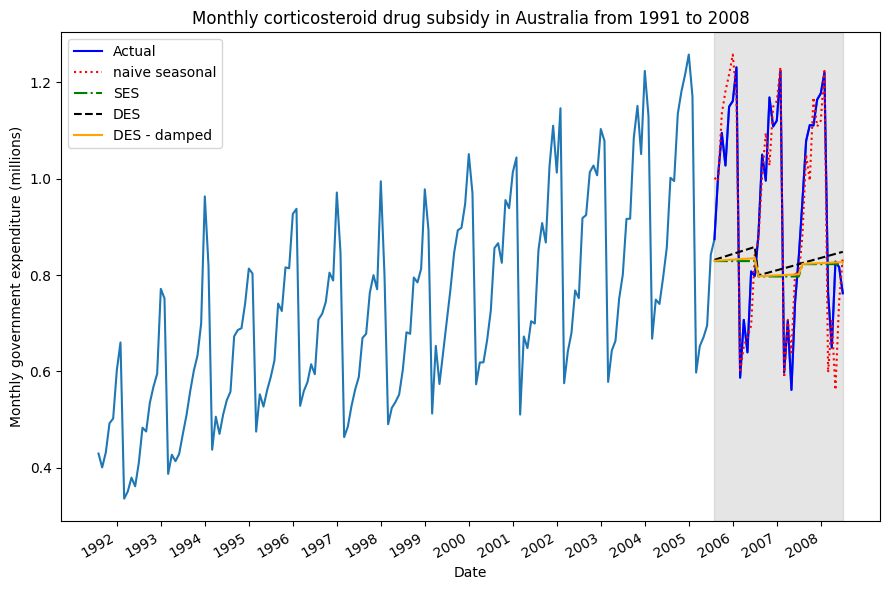

In [ ]:
fig, ax = plt.subplots()

ax.plot(df['value'])
ax.plot(test['value'], 'b-', label='Actual')
ax.plot(test['pred_last_season'], 'r:', label='naive seasonal')
ax.plot(test['pred_simple_exp'], 'g-.', label='SES')
ax.plot(test['pred_double_exp'], 'k--', label='DES')
ax.plot(test['pred_double_exp_damp'], color='orange', label='DES - damped')
ax.set_xlabel('Date')
ax.set_ylabel('Monthly government expenditure (millions)')
ax.axvspan(169, 204, color='#808080', alpha=0.2)
ax.legend(loc='best')


plt.xticks(np.arange(6, 204, 12), np.arange(1992, 2009, 1))

plt.title('Monthly corticosteroid drug subsidy in Australia from 1991 to 2008')

fig.autofmt_xdate()
plt.tight_layout()

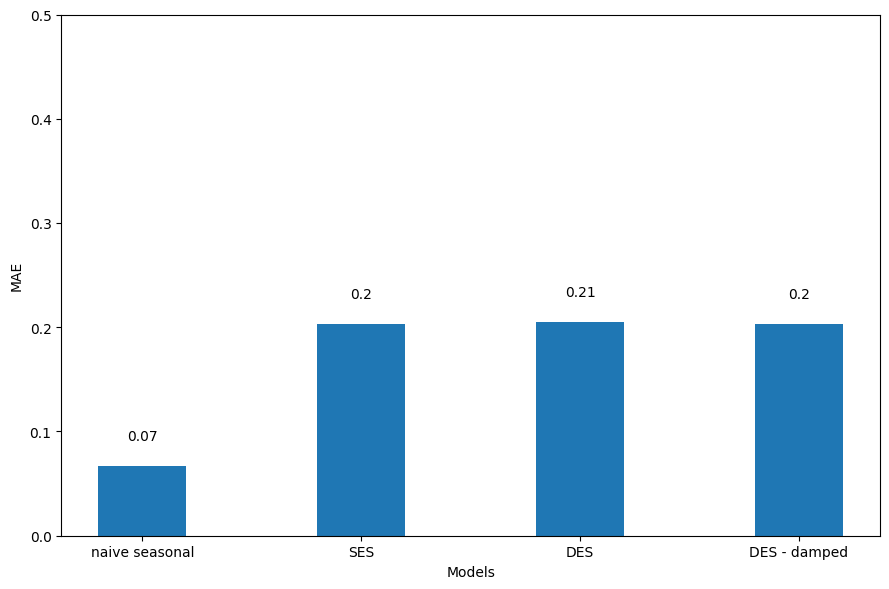

In [ ]:
des_mae = mean_absolute_error(test['value'], test['pred_double_exp'])
des_damp_mae = mean_absolute_error(test['value'], test['pred_double_exp_damp'])

fig, ax = plt.subplots()

x = ['naive seasonal', 'SES', 'DES', 'DES - damped']
y = [baseline_mae, ses_mae, des_mae, des_damp_mae]

ax.bar(x, y, width=0.4)
ax.set_xlabel('Models')
ax.set_ylabel('MAE')
ax.set_ylim(0, 0.5)

for index, value in enumerate(y):
    plt.text(x=index, y=value + 0.025, s=str(round(value,2)), ha='center')

plt.tight_layout()

## Triple exponential smoothing

Holt (1957) and Winters (1960) extended Holt's method to capture seasonality. The HoltWinters seasonal method comprises the forecast equation and three smoothing equations one for the level $\ell_t$, one for the trend $b_t$, and one for the seasonal component $s_t$, with corresponding smoothing parameters $\alpha, \beta^*$ and $\gamma$.

The component form for the additive method is:
$$
\begin{aligned}
\hat{y}_{t+h \mid t} & =\ell_t+h b_t+s_{t+h-m(k+1)} \\
\ell_t & =\alpha\left(y_t-s_{t-m}\right)+(1-\alpha)\left(\ell_{t-1}+b_{t-1}\right) \\
b_t & =\beta^*\left(\ell_t-\ell_{t-1}\right)+\left(1-\beta^*\right) b_{t-1} \\
s_t & =\gamma\left(y_t-\ell_{t-1}-b_{t-1}\right)+(1-\gamma) s_{t-m},
\end{aligned}
$$
where $m$ is the sum of seasonal component within each year, $k$ is the integer part of $(h-1) / m$, which ensures that the estimates of the seasonal indices used for forecasting come from the final year of the sample. The level equation shows a weighted average between the seasonally adjusted observation $\left(y_t-s_{t-m}\right)$ and the nonseasonal forecast $\left(\ell_{t-1}+b_{t-1}\right)$ for time $t$. The trend equation is identical to Holt's linear method. The seasonal equation shows a weighted average between the current seasonal index, $\left(y_t-\ell_{t-1}-b_{t-1}\right)$, and the seasonal index of the same season last year (i.e., $m$ time periods ago).


In [ ]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

def rolling_forecast(df: pd.DataFrame, train_len: int, horizon: int, window: int, method: str) -> list:

    total_len = train_len + horizon
    end_idx = train_len

    if method == 'last_season':
        pred_last_season = []

        for i in range(train_len, total_len, window):
            last_season = df[:i].iloc[-12:].values
            pred_last_season.extend(last_season)

        return pred_last_season

    elif method == 'simple_exp':
        pred_simple_exp = []

        for i in range(train_len, total_len, window):
            ses = SimpleExpSmoothing(df[:i], initialization_method='estimated').fit()
            predictions = ses.forecast(window)
            pred_simple_exp.extend(predictions)

        return pred_simple_exp

    elif method == 'double_exp':
        pred_double_exp = []

        for i in range(train_len, total_len, window):
            des = Holt(df[:i], initialization_method='estimated').fit()
            predictions = des.forecast(window)
            pred_double_exp.extend(predictions)

        return pred_double_exp

    elif method == 'double_exp_damp':
        pred_double_exp_damp = []

        for i in range(train_len, total_len, window):
            des_damp = Holt(df[:i],damped_trend=True, initialization_method='estimated').fit()
            predictions = des_damp.forecast(window)
            pred_double_exp_damp.extend(predictions)

        return pred_double_exp_damp

    elif method == 'triple_exp':
        pred_triple_exp = []

        for i in range(train_len, total_len, window):
            tes = ExponentialSmoothing(df[:i],
                                       trend='add',
                                       seasonal='additive',
                                       seasonal_periods=12,
                                       initialization_method='estimated').fit()
            predictions = tes.forecast(window)
            pred_triple_exp.extend(predictions)

        print(f"alpha = {tes.model.params['smoothing_level']}")
        print(f"beta = {tes.model.params['smoothing_trend']}")
        print(f"gamma = {tes.model.params['smoothing_seasonal']}")

        return pred_triple_exp

In [ ]:
pred_triple_exp = rolling_forecast(df['value'], TRAIN_LEN, HORIZON, WINDOW, 'triple_exp')

test.loc[:, 'pred_triple_exp'] = pred_triple_exp

test.head()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided a

alpha = 0.20109143861980475
beta = 1.785474408103923e-17
gamma = 0.514231319483526


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


,time,value,pred_last_season,pred_simple_exp,pred_double_exp,pred_double_exp_damp,pred_triple_exp
169,2005.500000,0.874336,1.001593,0.828866,0.831482,0.829358,0.969482
170,2005.583333,1.006497,0.994864,0.828866,0.833909,0.829902,0.967664
171,2005.666667,1.094736,1.134432,0.828866,0.836337,0.830438,1.100147
172,2005.750000,1.027043,1.181011,0.828866,0.838764,0.830966,1.143413
173,2005.833333,1.149232,1.216037,0.828866,0.841191,0.831486,1.133816


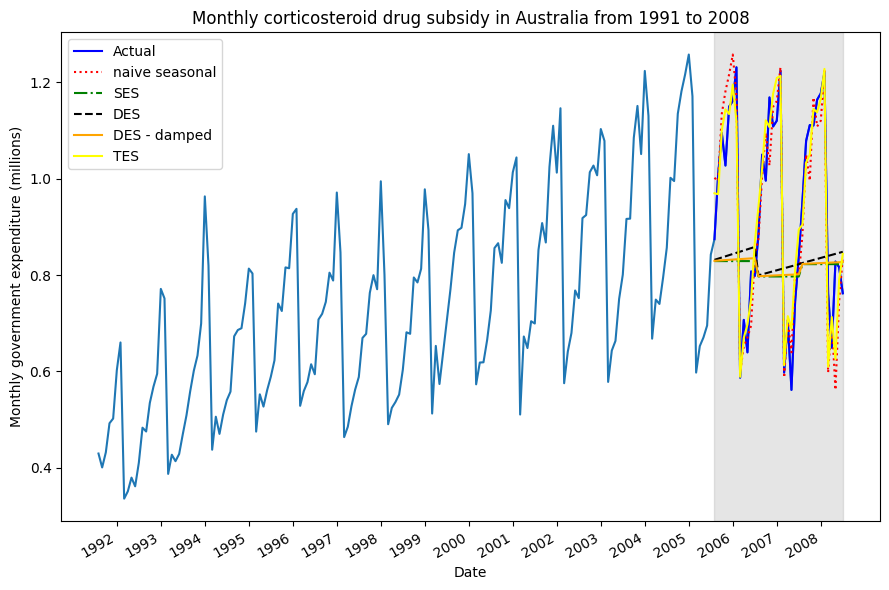

In [ ]:
fig, ax = plt.subplots()

ax.plot(df['value'])
ax.plot(test['value'], 'b-', label='Actual')
ax.plot(test['pred_last_season'], 'r:', label='naive seasonal')
ax.plot(test['pred_simple_exp'], 'g-.', label='SES')
ax.plot(test['pred_double_exp'], 'k--', label='DES')
ax.plot(test['pred_double_exp_damp'], color='orange', label='DES - damped')
ax.plot(test['pred_triple_exp'], color='yellow', label='TES')
ax.set_xlabel('Date')
ax.set_ylabel('Monthly government expenditure (millions)')
ax.axvspan(169, 204, color='#808080', alpha=0.2)
ax.legend(loc='best')


plt.xticks(np.arange(6, 204, 12), np.arange(1992, 2009, 1))

plt.title('Monthly corticosteroid drug subsidy in Australia from 1991 to 2008')

fig.autofmt_xdate()
plt.tight_layout()

In [ ]:
tes_mae = mean_absolute_error(test['value'], test['pred_triple_exp'])

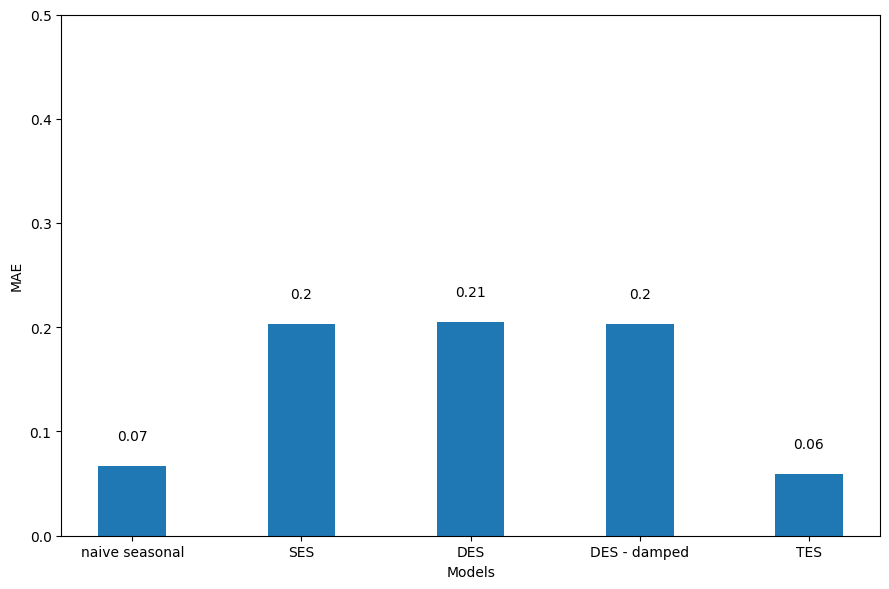

In [ ]:
fig, ax = plt.subplots()

x = ['naive seasonal', 'SES', 'DES', 'DES - damped', 'TES']
y = [baseline_mae, ses_mae, des_mae, des_damp_mae, tes_mae]

ax.bar(x, y, width=0.4)
ax.set_xlabel('Models')
ax.set_ylabel('MAE')
ax.set_ylim(0, 0.5)

for index, value in enumerate(y):
    plt.text(x=index, y=value + 0.025, s=str(round(value,2)), ha='center')

plt.tight_layout()

# ARIMA

- The ARIMA ($p, d, q$) model, introduced by Box and Jenkins (1976), is a linear regression model indulged in tracking linear tendencies in stationary time series data. It comprises of the following components:

    * $\operatorname{AR}(\mathrm{p})$ : autoregressive
(lagged observations as inputs)
    * I (d): integrated (differencing to make series stationary)
    * MA (q): moving average (lagged errors as inputs)
- The mathematical expression of the ARIMA model is as follows:
$$
y_t=\theta_0+\phi_1 y_{t-1}+\phi_2 y_{t-2}+\cdots+\phi_p y_{t-p}+\varepsilon_t-\theta_1 \varepsilon_{t-1}-\theta_2 \varepsilon_{t-2}-\cdots-\theta_q \varepsilon_{t-q}
$$
where $y_t$ is the actual value, $\varepsilon_t$ is the random error at time $t, \phi_i$, and $\theta_j$ are the coefficients of the model. It is assumed that $\varepsilon_{t-1}\left(\varepsilon_{t-1}=y_{t-1}-\hat{y}_{t-1}\right)$ has zero mean with constant variance and satisfies the i.i.d condition.
- Three basic Steps: Model identification, Parameter Estimation, and Diagnostic Checking.

In [ ]:
from statsmodels.stats.diagnostic import acorr_ljungbox
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.stattools import adfuller

from tqdm import tqdm_notebook
from itertools import product

## Forecasting with ARIMA(p,d,q)

In [ ]:
df = pd.read_csv('qauselec.csv', index_col=0)
df.head()

,time,value
1,1956.00,3.923
2,1956.25,4.436
3,1956.50,4.806
4,1956.75,4.418
5,1957.00,4.339


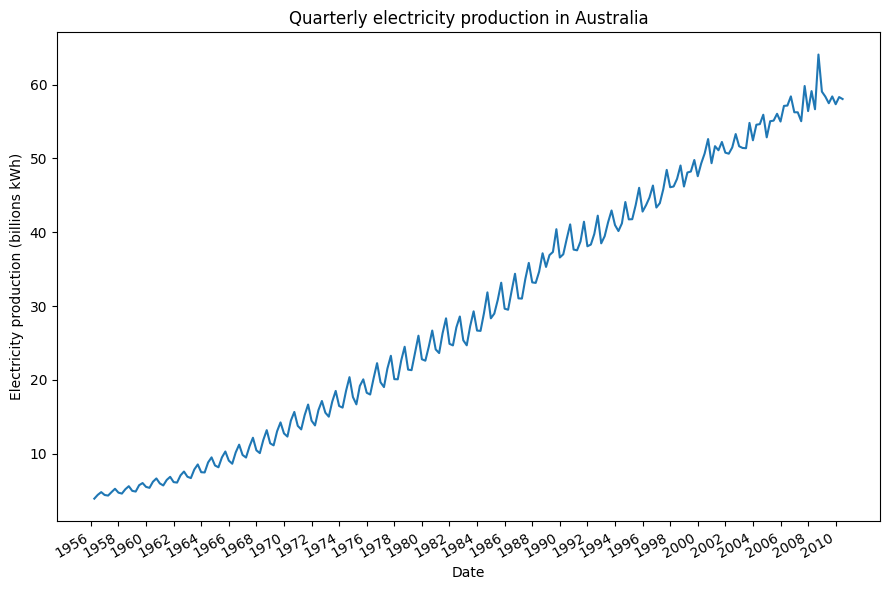

In [ ]:
fig, ax = plt.subplots()

ax.plot(df['value'])
ax.set_xlabel('Date')
ax.set_ylabel('Electricity production (billions kWh)')

plt.xticks(np.arange(0, 218, 8), np.arange(1956, 2012, 2))

plt.title('Quarterly electricity production in Australia')

fig.autofmt_xdate()
plt.tight_layout()

### General modling procedure

#### Find value of *d*

In [ ]:
ad_fuller_result = adfuller(df['value'])

print(f'ADF Statistic: {ad_fuller_result[0]}')
print(f'p-value: {ad_fuller_result[1]}')

ADF Statistic: 0.996327722990561
p-value: 0.9942270502497619


In [ ]:
df_diff = np.diff(df['value'], n=1)

ad_fuller_result = adfuller(df_diff)

print(f'ADF Statistic: {ad_fuller_result[0]}')
print(f'p-value: {ad_fuller_result[1]}')

ADF Statistic: -3.1727118466027764
p-value: 0.021619564130373827


#### Train/test split

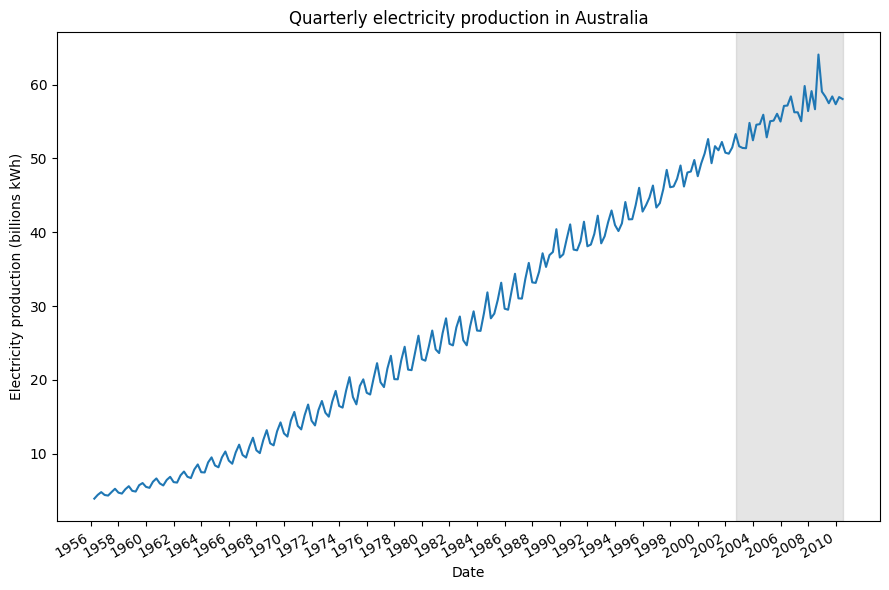

In [ ]:
fig, ax = plt.subplots()

ax.plot(df['value'])
ax.set_xlabel('Date')
ax.set_ylabel('Electricity production (billions kWh)')
ax.axvspan(187, 218, color='#808080', alpha=0.2)

plt.xticks(np.arange(0, 218, 8), np.arange(1956, 2012, 2))

plt.title('Quarterly electricity production in Australia')

fig.autofmt_xdate()
plt.tight_layout()

In [ ]:
train = df['value'][:-32]
test = df.iloc[-32:]

In [ ]:
def ARIMA_gridsearch(endog, min_p, max_p, min_q, max_q, d):

    all_p = range(min_p, max_p+1, 1)
    all_q = range(min_q, max_q+1, 1)

    all_orders = list(product(all_p, all_q))

    print(f'Fitting {len(all_orders)} unique models')

    results = []

    for order in tqdm_notebook(all_orders):
        try:
            model = SARIMAX(endog, order=(order[0], d, order[1])).fit()
        except:
            continue

        results.append([order, model.aic])

    result_df = pd.DataFrame(results)
    result_df.columns = ['(p,q)', 'AIC']

    #Sort in ascending order, lower AIC is better
    result_df = result_df.sort_values(by='AIC', ascending=True).reset_index(drop=True)

    return result_df

#### Model selection with AIC

In [ ]:
result_df = ARIMA_gridsearch(train, 0, 4, 0, 4, 1)
result_df.head()

Fitting 25 unique models


  0%|          | 0/25 [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dat

,"(p,q)",AIC
0,"(4, 4)",309.329797
1,"(4, 3)",326.858270
2,"(4, 2)",343.639728
3,"(4, 1)",348.707306
4,"(3, 4)",357.081590


In [ ]:
model = SARIMAX(train, order=(4,1,4), simple_differencing=False)
model_fit = model.fit(disp=False)

print(model_fit.summary())

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:                  value   No. Observations:                  186
Model:               SARIMAX(4, 1, 4)   Log Likelihood                -145.665
Date:                Fri, 11 Aug 2023   AIC                            309.330
Time:                        06:53:14   BIC                            338.313
Sample:                             0   HQIC                           321.076
                                - 186                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0175      0.024     -0.746      0.456      -0.064       0.029
ar.L2         -0.0207      0.023     -0.897      0.370      -0.066       0.025
ar.L3         -0.0185      0.024     -0.769      0.4

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


#### Residuals analysis

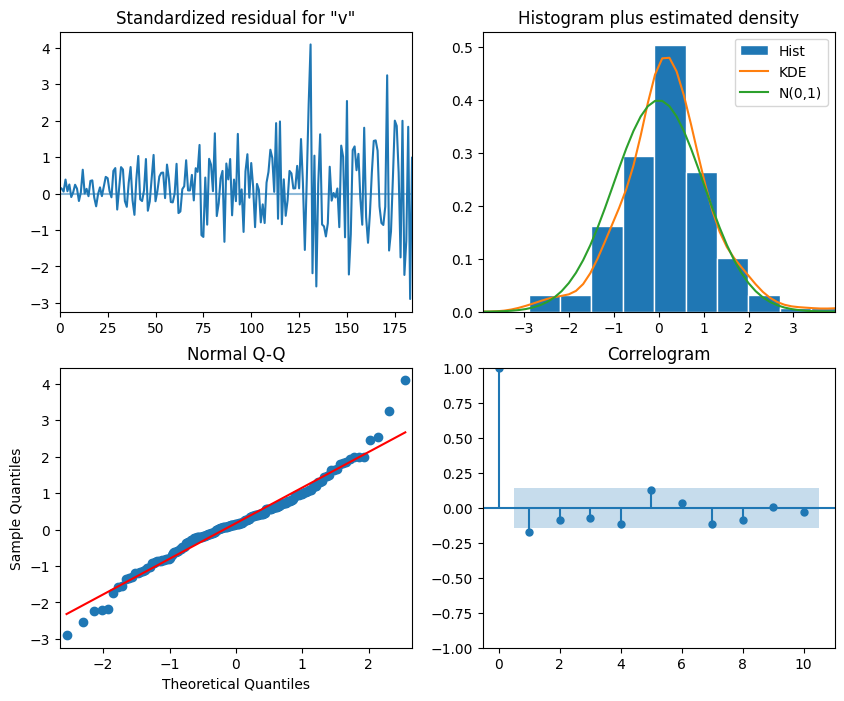

In [ ]:
model_fit.plot_diagnostics(figsize=(10,8));

#### Forecasting

In [ ]:
def rolling_predictions(df, train_len, horizon, window, period, method):

    TOTAL_LEN = train_len + horizon

    seasonal_steps = int((window/period))

    if method == 'mean':
        pred_mean = []

        for i in range(train_len, TOTAL_LEN, window):
            mean = np.mean(df[:i].values)
            pred_mean.extend(mean for _ in range(window))

        return pred_mean[:horizon]

    elif method == 'last':
        pred_last_value = []

        for i in range(train_len, TOTAL_LEN, window):
            last_value = diff[:i].iloc[-1].values[0]
            pred_last_value.extend(last_value for _ in range(window))

        return pred_last_value[:horizon]

    elif method == 'last_season':
        pred_last_season = []

        for i in range(train_len, TOTAL_LEN, window):
            last_season = df[:i][-period:].values
            pred_last_season.extend(last_season for _ in range(seasonal_steps))

        pred_last_season = np.array(pred_last_season).reshape(1, -1)

        return pred_last_season[0][:horizon]

    if method == 'ARIMA':
        pred_ARIMA = []

        for i in range(train_len, TOTAL_LEN, window):
            model = SARIMAX(df[:i], order=(4,1,4))
            res = model.fit(disp=False)
            predictions = res.get_prediction(0, i + window - 1)
            oos_pred = predictions.predicted_mean[-window:]
            pred_ARIMA.extend(oos_pred)

        return pred_ARIMA[:horizon]

In [ ]:
pred_df = test.copy()

TRAIN_LEN = len(train)
HORIZON = len(test)

windows = [4, 8, 16, 32]

for window in windows:

    pred_mean = rolling_predictions(df['value'], TRAIN_LEN, HORIZON, window, 4, 'mean')
    pred_last_season = rolling_predictions(df['value'], TRAIN_LEN, HORIZON, window, 4, 'last_season')
    pred_ARIMA = rolling_predictions(df['value'], TRAIN_LEN, HORIZON, window, 4, 'ARIMA')

    pred_df[f'pred_mean_{window}'] = pred_mean
    pred_df[f'pred_last_season_{window}'] = pred_last_season
    pred_df[f'pred_ARIMA_{window}'] = pred_ARIMA

pred_df.head()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be i

,time,value,pred_mean_4,pred_last_season_4,pred_ARIMA_4,pred_mean_8,pred_last_season_8,pred_ARIMA_8,pred_mean_16,pred_last_season_16,pred_ARIMA_16,pred_mean_32,pred_last_season_32,pred_ARIMA_32
187,2002.50,53.299,24.806237,52.226,53.107479,24.806237,52.226,53.107479,24.806237,52.226,53.107479,24.806237,52.226,53.107479
188,2002.75,51.646,24.806237,50.778,50.863760,24.806237,50.778,50.863760,24.806237,50.778,50.863760,24.806237,50.778,50.863760
189,2003.00,51.415,24.806237,50.639,51.719677,24.806237,50.639,51.719677,24.806237,50.639,51.719677,24.806237,50.639,51.719677
190,2003.25,51.379,24.806237,51.486,52.226783,24.806237,51.486,52.226783,24.806237,51.486,52.226783,24.806237,51.486,52.226783
191,2003.50,54.808,25.377363,53.299,53.302828,24.806237,52.226,53.826284,24.806237,52.226,53.826284,24.806237,52.226,53.826284


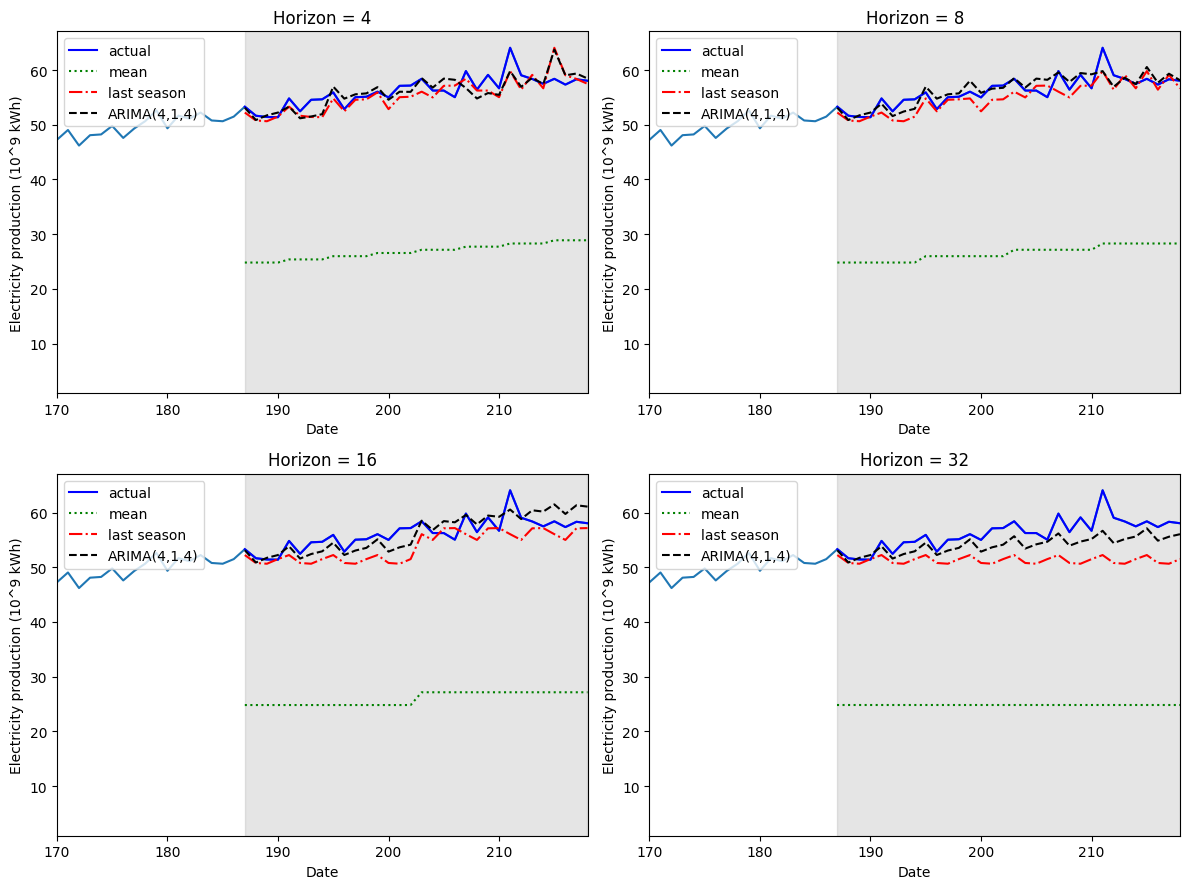

In [ ]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12,9))

for i, ax in enumerate(axes.flatten()):

    ax.plot(df['value'])
    ax.plot(pred_df['value'], 'b-', label='actual')
    ax.plot(pred_df[f'pred_mean_{windows[i]}'], 'g:', label='mean')
    ax.plot(pred_df[f'pred_last_season_{windows[i]}'], 'r-.', label='last season')
    ax.plot(pred_df[f'pred_ARIMA_{windows[i]}'], 'k--', label='ARIMA(4,1,4)')

    ax.legend(loc=2)
    ax.set_xlabel('Date')
    ax.set_ylabel('Electricity production (10^9 kWh)')
    ax.axvspan(187, 218, color='#808080', alpha=0.2)
    ax.set_xlim(170, 218)
    ax.set_title(f'Horizon = {windows[i]}')

plt.tight_layout()

#### Evaluation

In [ ]:
def mape(y_true, y_pred):
    return round(np.mean(np.abs((y_true - y_pred) / y_true)) * 100, 2)

In [ ]:
mape_naive_seasonal_4 = mape(pred_df['value'], pred_df['pred_last_season_4'])
mape_ARIMA_4 = mape(pred_df['value'], pred_df['pred_ARIMA_4'])

mape_naive_seasonal_8 = mape(pred_df['value'], pred_df['pred_last_season_8'])
mape_ARIMA_8 = mape(pred_df['value'], pred_df['pred_ARIMA_8'])

mape_naive_seasonal_16 = mape(pred_df['value'], pred_df['pred_last_season_16'])
mape_ARIMA_16 = mape(pred_df['value'], pred_df['pred_ARIMA_16'])

mape_naive_seasonal_32 = mape(pred_df['value'], pred_df['pred_last_season_32'])
mape_ARIMA_32 = mape(pred_df['value'], pred_df['pred_ARIMA_32'])

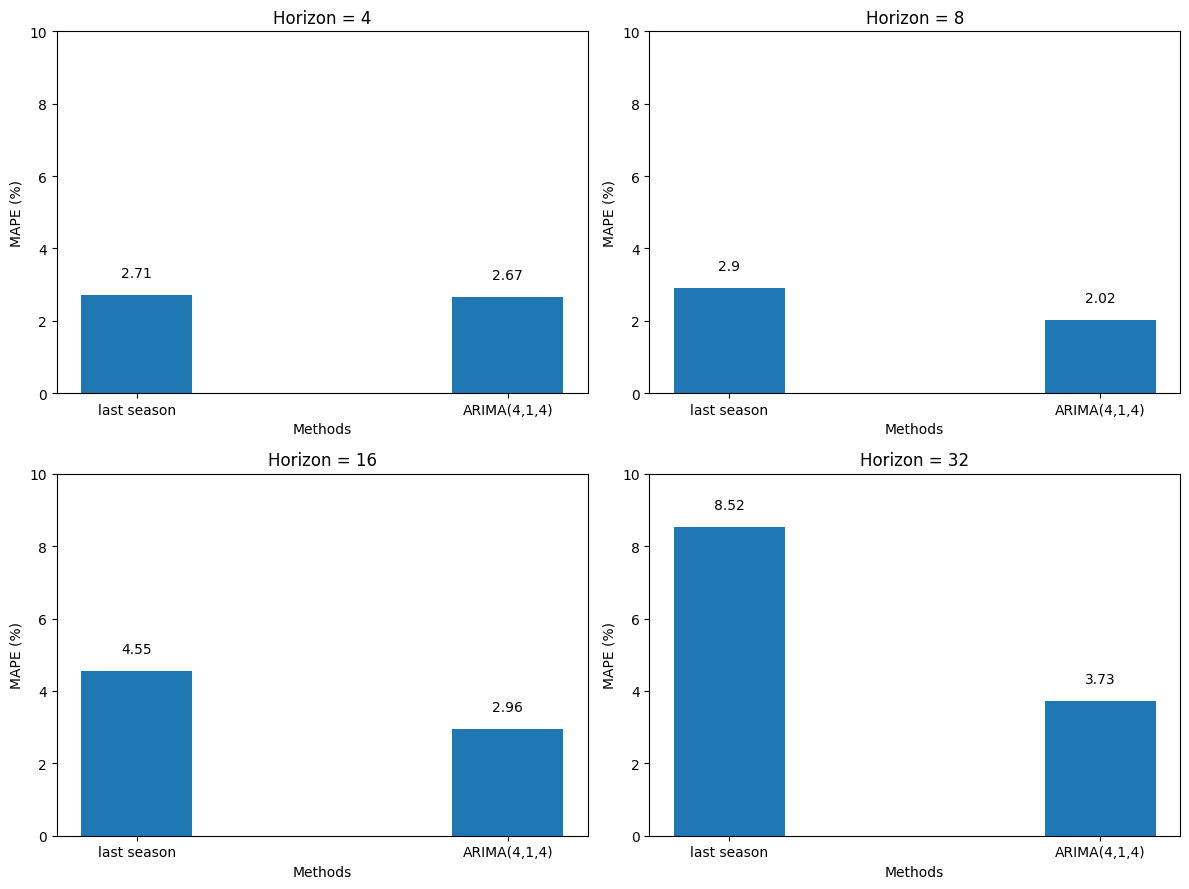

In [ ]:
mapes_naive_seasonal = [mape_naive_seasonal_4, mape_naive_seasonal_8, mape_naive_seasonal_16, mape_naive_seasonal_32]
mapes_ARIMA = [mape_ARIMA_4, mape_ARIMA_8, mape_ARIMA_16, mape_ARIMA_32]

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12,9))

x = ['last season', 'ARIMA(4,1,4)']
width = 0.3

for i, ax in enumerate(axes.flatten()):

    y = [mapes_naive_seasonal[i], mapes_ARIMA[i]]
    ax.bar(x, y, width)
    ax.set_xlabel('Methods')
    ax.set_ylabel('MAPE (%)')
    ax.set_ylim(0, 10)
    ax.set_title(f'Horizon = {windows[i]}')

    for index, value in enumerate(y):
        ax.text(x=index, y=value+0.5, s=str(value), ha='center')

plt.tight_layout()

# ARNN

- ARNN $(p, k)$ model is a nonlinear time series model which uses $p$ lagged values of the time series as inputs to the single hidden layered feed-forward neural network (Faraway and Chatfield, Journal of Royal Statistical Society - C, 1998).
- The mathematical form of the ARNN $(p, k)$ model with $\mathrm{k}$ hidden nodes is given by:
$$
\hat{x}_t=\phi_0\left\{w_{c_0}+\sum_h w_{h_0} \phi_h\left(w_{c_h}+\sum_i w_{i_h} x_{t-j_i}\right)\right\},
$$
where $w_{c_h}$ denotes the connecting weights and $\phi_i$ is the activation function.
- An ARNN $(p, k)$ model uses $p$ as the optimal number of lags (calculated based on the AIC value) for an $\operatorname{AR}(p)$ model.

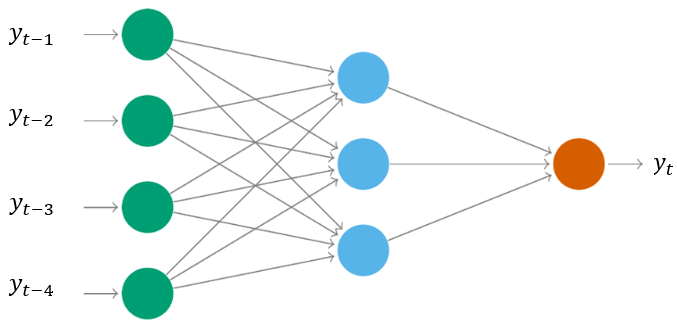

In [ ]:
# univariate multi-step vector-output mlp example
from numpy import array
from keras.models import Sequential
from keras.layers import Dense

In [ ]:
# split a univariate sequence into samples
def split_sequence(sequence, n_steps_in, n_steps_out):
	X, y = list(), list()
	for i in range(len(sequence)):
		# find the end of this pattern
		end_ix = i + n_steps_in
		out_end_ix = end_ix + n_steps_out
		# check if we are beyond the sequence
		if out_end_ix > len(sequence):
			break
		# gather input and output parts of the pattern
		seq_x, seq_y = sequence[i:end_ix], sequence[end_ix:out_end_ix]
		X.append(seq_x)
		y.append(seq_y)
	return array(X), array(y)

In [ ]:
# define input sequence
raw_seq = [10, 20, 30, 40, 50, 60, 70, 80, 90]
# choose a number of time steps
n_steps_in, n_steps_out = 3, 2
# split into samples
X, y = split_sequence(raw_seq, n_steps_in, n_steps_out)

In [ ]:
print(X.shape)
print(y.shape)

(5, 3)
(5, 2)


In [ ]:
# define model
model = Sequential()
model.add(Dense(4, activation='relu', input_dim=n_steps_in))
model.add(Dense(n_steps_out))
model.compile(optimizer='adam', loss='mse')
# fit model
model.fit(X, y, epochs=2000, verbose=0)

In [ ]:
# demonstrate prediction
x_input = array([70, 80, 90])
x_input = x_input.reshape((1, n_steps_in))
yhat = model.predict(x_input, verbose=0)
print(yhat)

[[111.7224  134.90305]]


# LSTM

- LSTM was proposed by Hochreiter and Schmidhuber, 1997
- LSTM is a chain-like structure capable of remembering information and long-term training with four network layers.
- Besides, LSTM is designed in such a way that the vanishing gradient problem is solved.
- LSTM has become a popular choice in various applied fields including time series forecasting.

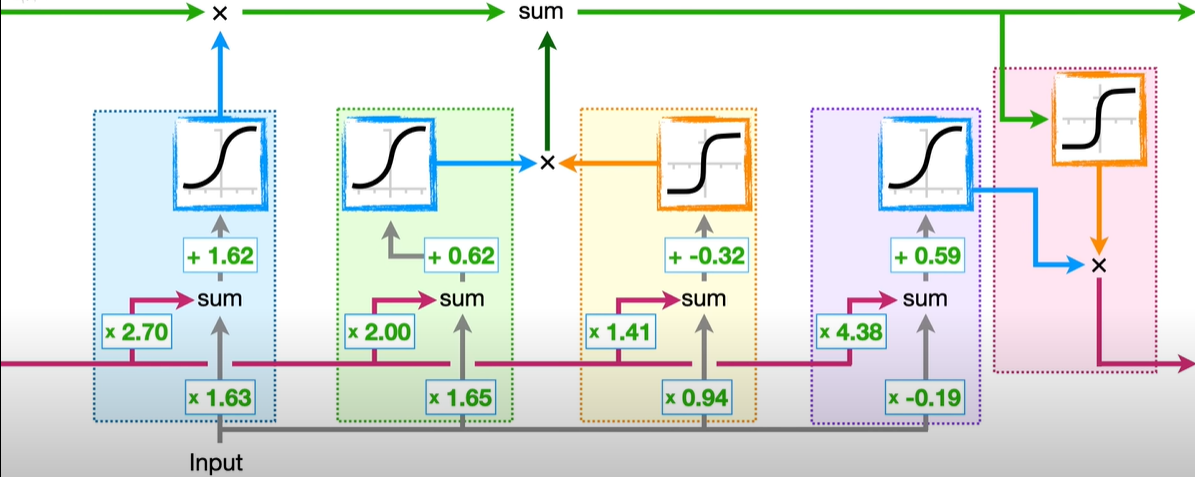

In [64]:
# univariate lstm example
from numpy import array
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense

In [65]:
# split a univariate sequence into samples
def split_sequence(sequence, n_steps):
	X, y = list(), list()
	for i in range(len(sequence)):
		# find the end of this pattern
		end_ix = i + n_steps
		# check if we are beyond the sequence
		if end_ix > len(sequence)-1:
			break
		# gather input and output parts of the pattern
		seq_x, seq_y = sequence[i:end_ix], sequence[end_ix]
		X.append(seq_x)
		y.append(seq_y)
	return array(X), array(y)

In [66]:
# define input sequence
raw_seq = [10, 20, 30, 40, 50, 60, 70, 80, 90]
# choose a number of time steps
n_steps = 3
# split into samples
X, y = split_sequence(raw_seq, n_steps)
# reshape from [samples, timesteps] into [samples, timesteps, features]
n_features = 1
X = X.reshape((X.shape[0], X.shape[1], n_features))
print(X,y)

[[[10]
  [20]
  [30]]

 [[20]
  [30]
  [40]]

 [[30]
  [40]
  [50]]

 [[40]
  [50]
  [60]]

 [[50]
  [60]
  [70]]

 [[60]
  [70]
  [80]]] [40 50 60 70 80 90]


### Vanilla LSTM

In [67]:
# define model
model = Sequential()
model.add(LSTM(50, activation='relu', input_shape=(n_steps, n_features)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')
# fit model
model.fit(X, y, epochs=200, verbose=0)

In [68]:
# demonstrate prediction
x_input = array([70, 80, 90])
x_input = x_input.reshape((1, n_steps, n_features))
yhat = model.predict(x_input, verbose=0)
print(yhat)

[[102.04642]]


### Stacked LSTM

In [69]:
# define model
model = Sequential()
model.add(LSTM(50, activation='relu', return_sequences=True, input_shape=(n_steps, n_features)))
model.add(LSTM(50, activation='relu'))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')
# fit model
model.fit(X, y, epochs=200, verbose=0)

In [70]:
# demonstrate prediction
x_input = array([70, 80, 90])
x_input = x_input.reshape((1, n_steps, n_features))
yhat = model.predict(x_input, verbose=0)
print(yhat)

[[103.350235]]


References:



*   [Forecasting Principles and Practive](https://otexts.com/fpp3/)
*   [Time Series Forecasting in Python](https://www.manning.com/books/time-series-forecasting-in-python-book)
*  [Deep Learning for Time Series Forecasting](https://machinelearningmastery.com/deep-learning-for-time-series-forecasting/)
*  [Rob J Hyndman Blog](https://robjhyndman.com/)
*  [Tanujit Chakraborty Blog](https://www.ctanujit.org/)
*  [Video Lectures by StatQuest with Josh Starmer](https://www.youtube.com/@statquest)

